# 60mer design

## 0 Introduction
Investigation of the predicted (SignalP) and synthetic (AutoML) signal peptide sequences requires testing under lab conditions to measure the peptide abundances. In order to achieve this, an experimental design needs to be structured and set of primers should be constructed for the insertion of the desired signal peptide sequences into the chromosome of the _A. oryzae_ RIB40


### Agenda:
- Isolate the top 10-15 signalP sequences 
- Construct primers to insert singalP sequences 

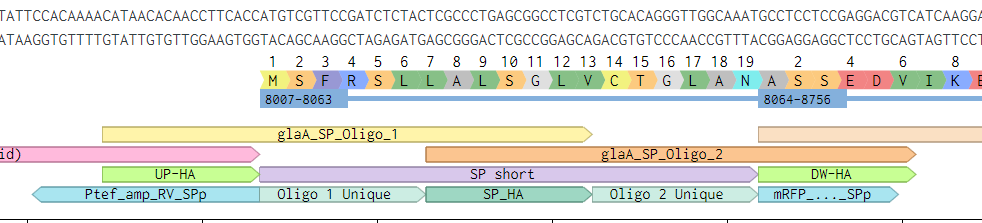

In [ ]:
# Load illustration desgined by Martí Morera Gómez!
from IPython.display import Image
Image(filename='../Data/primer_design.png')

In [8]:
# Load the latest form of the singalP dataset
df_signalP = pd.read_csv('../Data/07_H2O_AutoML/ML_rnaseq_normalized_signal_peptides.csv')
df_signalP

,Accession,sequence,length,normalized abundances
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08
3,AO090003000935,MEAFNLHNFLSSLYILLPFVILANPVH,27,1.733901e+08
4,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08
...,...,...,...,...
1056,AO090103000483,MKTSFLLAAIGFLYRLPCS,19,0.000000e+00
1057,AO090103000487,MTRYLSFLFLLILFGNSVF,19,0.000000e+00
1058,AO090103000493,MRGIVALSFLSVALGVT,17,0.000000e+00
1059,AO090701000994,MRLLLIAPLFSAVSYGAQ,18,0.000000e+00


## Codon optimizaiton

Lets optimize the codon sequences for _A. oryzae_  

In [10]:
import python_codon_tables as pct
from python_codon_tables import download_codons_table

In [11]:
# Get the codon table for A. oryzae from the database
aspergillus_codon_usage_table = download_codons_table(taxid=12388)
aspergillus_codon_usage_table

{'*': {'UAA': 0.0, 'UAG': 0.0, 'UGA': 1.0},
 'A': {'GCA': 0.07, 'GCC': 0.4, 'GCG': 0.33, 'GCU': 0.2},
 'C': {'UGC': 1.0, 'UGU': 0.0},
 'D': {'GAC': 0.87, 'GAU': 0.13},
 'E': {'GAA': 0.14, 'GAG': 0.86},
 'F': {'UUC': 1.0, 'UUU': 0.0},
 'G': {'GGA': 0.11, 'GGC': 0.42, 'GGG': 0.32, 'GGU': 0.16},
 'H': {'CAC': 1.0, 'CAU': 0.0},
 'I': {'AUA': 0.0, 'AUC': 0.93, 'AUU': 0.07},
 'K': {'AAA': 0.0, 'AAG': 1.0},
 'L': {'CUA': 0.0,
  'CUC': 0.42,
  'CUG': 0.54,
  'CUU': 0.04,
  'UUA': 0.0,
  'UUG': 0.0},
 'M': {'AUG': 1.0},
 'N': {'AAC': 0.83, 'AAU': 0.17},
 'P': {'CCA': 0.06, 'CCC': 0.18, 'CCG': 0.65, 'CCU': 0.12},
 'Q': {'CAA': 0.2, 'CAG': 0.8},
 'R': {'AGA': 0.0,
  'AGG': 0.09,
  'CGA': 0.12,
  'CGC': 0.35,
  'CGG': 0.35,
  'CGU': 0.09},
 'S': {'AGC': 0.27,
  'AGU': 0.0,
  'UCA': 0.0,
  'UCC': 0.09,
  'UCG': 0.45,
  'UCU': 0.18},
 'T': {'ACA': 0.08, 'ACC': 0.5, 'ACG': 0.35, 'ACU': 0.08},
 'V': {'GUA': 0.12, 'GUC': 0.32, 'GUG': 0.56, 'GUU': 0.0},
 'W': {'UGG': 1.0},
 'Y': {'UAC': 0.89, 'UAU': 0.1

Lets define a function to change uracil (U) in the codon table with the tyrosine (T)

In [12]:
def modify_codon_table(codon_table):
    """
    Replace 'U' with 'T' in all codons of a given codon usage table.

    Args:
        codon_table (dict): A dictionary containing codon usage frequencies for each amino acid.

    Returns:
        dict: A new dictionary containing the modified codon usage frequencies.
    """
    new_codon_table = {}  # Initialize a new dictionary to store the modified codon usage table
    for amino_acid, codons in codon_table.items():  # Iterate over the amino acids and their codons in the input table
        new_codons = {}  # Initialize a new dictionary to store the modified codons for the current amino acid
        for codon, frequency in codons.items():  # Iterate over the codons and their frequencies for the current amino acid
            new_codon = codon.replace('U', 'T')  # Replace all 'U's with 'T's in the current codon
            new_codons[new_codon] = frequency  # Add the modified codon to the new dictionary with the same frequency
        new_codon_table[amino_acid] = new_codons  # Add the new dictionary of modified codons to the main dictionary for the current amino acid
    return new_codon_table  # Return the new dictionary containing the modified codon usage frequencies


In [13]:
# Modify the codon table to change uracil (U) with tyrosine (T)
modified_codon_table = modify_codon_table(aspergillus_codon_usage_table)
modified_codon_table

{'*': {'TAA': 0.0, 'TAG': 0.0, 'TGA': 1.0},
 'A': {'GCA': 0.07, 'GCC': 0.4, 'GCG': 0.33, 'GCT': 0.2},
 'C': {'TGC': 1.0, 'TGT': 0.0},
 'D': {'GAC': 0.87, 'GAT': 0.13},
 'E': {'GAA': 0.14, 'GAG': 0.86},
 'F': {'TTC': 1.0, 'TTT': 0.0},
 'G': {'GGA': 0.11, 'GGC': 0.42, 'GGG': 0.32, 'GGT': 0.16},
 'H': {'CAC': 1.0, 'CAT': 0.0},
 'I': {'ATA': 0.0, 'ATC': 0.93, 'ATT': 0.07},
 'K': {'AAA': 0.0, 'AAG': 1.0},
 'L': {'CTA': 0.0,
  'CTC': 0.42,
  'CTG': 0.54,
  'CTT': 0.04,
  'TTA': 0.0,
  'TTG': 0.0},
 'M': {'ATG': 1.0},
 'N': {'AAC': 0.83, 'AAT': 0.17},
 'P': {'CCA': 0.06, 'CCC': 0.18, 'CCG': 0.65, 'CCT': 0.12},
 'Q': {'CAA': 0.2, 'CAG': 0.8},
 'R': {'AGA': 0.0,
  'AGG': 0.09,
  'CGA': 0.12,
  'CGC': 0.35,
  'CGG': 0.35,
  'CGT': 0.09},
 'S': {'AGC': 0.27,
  'AGT': 0.0,
  'TCA': 0.0,
  'TCC': 0.09,
  'TCG': 0.45,
  'TCT': 0.18},
 'T': {'ACA': 0.08, 'ACC': 0.5, 'ACG': 0.35, 'ACT': 0.08},
 'V': {'GTA': 0.12, 'GTC': 0.32, 'GTG': 0.56, 'GTT': 0.0},
 'W': {'TGG': 1.0},
 'Y': {'TAC': 0.89, 'TAT': 0.1

Lets define a function for the back translation of the protein sequences into DNA sequences

In [14]:
from Bio.Seq import Seq

def back_translate(seq):
    """
    Back translate is a function for the transltion of the amino acid sequences in the given DataFrame to nucleotide sequences
    according to codons assigned per amino acid. 
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing amino acid sequences
    
    Returns:
    nucleotide_sequences (list): List of nucleotide sequences determined according to the species codon table
    """
       
    codon_table = modified_codon_table
    
    dna_sequences = []
    for aa_seq in seq:
        dna_seq = ''
        for aa in aa_seq:
            codons = codon_table[aa]
            codon = max(codons, key=codons.get)
            if codon:
                dna_seq += codon
        dna_sequences.append(dna_seq)
    return dna_sequences


In [15]:
# Convert the protein sequences into dna sequences according to the back translate function
aa_seq = df_signalP['sequence']
top10_aa_seq = aa_seq[:12]

dna_sequences = back_translate(top10_aa_seq)
dna_sequences

['ATGCTGCGCGTGTCGGCCATCTTCATGGCCTGCCTGCTGCTGGCCACCGCCGCC',
 'ATGCCGATCAAGTCGTTCGCCTCGCGCCTGGCCCTGTCGCTGGCCATCTGCGGCACCGCCATG',
 'ATGCACCTGCCGACCCTGGTGACCCTGGCCTGCATGGCCGTGTCGGCCTCG',
 'ATGGAGGCCTTCAACCTGCACAACTTCCTGTCGTCGCTGTACATCCTGCTGCCGTTCGTGATCCTGGCCAACCCGGTGCAC',
 'ATGAAGGTGGCCATCTTCTCGACCCTGCTGCCGCTGGTGCTGGCCCTGCCGGCCCCGCAGACC',
 'ATGGCCGTGCGCATCGCCCGCTTCCTGGGCCTGTCGACCGTGGCCTACCTGGCCCTGGCCAACGGCATCGAC',
 'ATGCACCTGGCCATCAAGTCGCTGTTCGTGTCGCTGCTGGGCGCCTCGGTGCTGGCCTCGCCGCTGCCGTCGAACGCCCTGGTGGAG',
 'ATGCACTTCCACCGCCTGCTGGTGCTGGCCGCCGGCCTGCTGACCACCGCCACCTCGGCCCCGACCGAGCTGTTCAAG',
 'ATGCGCTCGACCCTGTGGTCGCTGCTGGGCCTGACCGGCCTGGCCTAC',
 'ATGTACCTGTCGAAGATCATCTCGATCTCGTTCCTGGCCGCCCTGGCCGGCGCCGCCGCCACCCCGTCGAACCTGGAGGCC',
 'ATGCAGTTCAAGAACCTGGCCCTGGCCGCCTCGATCGTGGCCACCGCCGCCGCCGCCCCGGCCGCC',
 'ATGAAGTTCTCGATCGTGGCCCTGGTGCTGGCCGCCACCTCGGCCATCGCCACCCCGATCGTGACCAAG']

In [16]:
# Homology arms according to positive/top strand (5´ to 3´)
up_homology_arm = "CCACAAAACATAACACAACCTTCACC" # Annealing in Ptef 
down_homology_arm = "GCCTCCTCCGAGGACG" # Annealing in RFP

# Reverse complement of up homology arm (bottom negative strand in 5´ to 3´ direction)
UP_HA_rvrs = up_homology_arm.translate(complement)[::-1] 
# up_homology_amr = "GGTGAAGGTTGTGTTATGTTTTGTGG" (negative strand - 5´ to 3´)


In [129]:
# Create a new list to store the modified sequences
modified_sequences = []

# Loop through the DNA sequences and add the homology arms to the beginning and end
for seq in dna_sequences:
    #modified_seq = up_homology_arm + seq.lower() + down_homology_arm
    modified_seq = up_homology_arm + seq + down_homology_arm
    modified_sequences.append(modified_seq)

modified_sequences

['CCACAAAACATAACACAACCTTCACCATGCTGCGCGTGTCGGCCATCTTCATGGCCTGCCTGCTGCTGGCCACCGCCGCCGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCCGATCAAGTCGTTCGCCTCGCGCCTGGCCCTGTCGCTGGCCATCTGCGGCACCGCCATGGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCACCTGCCGACCCTGGTGACCCTGGCCTGCATGGCCGTGTCGGCCTCGGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGGAGGCCTTCAACCTGCACAACTTCCTGTCGTCGCTGTACATCCTGCTGCCGTTCGTGATCCTGGCCAACCCGGTGCACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGAAGGTGGCCATCTTCTCGACCCTGCTGCCGCTGGTGCTGGCCCTGCCGGCCCCGCAGACCGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGGCCGTGCGCATCGCCCGCTTCCTGGGCCTGTCGACCGTGGCCTACCTGGCCCTGGCCAACGGCATCGACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCACCTGGCCATCAAGTCGCTGTTCGTGTCGCTGCTGGGCGCCTCGGTGCTGGCCTCGCCGCTGCCGTCGAACGCCCTGGTGGAGGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCACTTCCACCGCCTGCTGGTGCTGGCCGCCGGCCTGCTGACCACCGCCACCTCGGCCCCGACCGAGCTGTTCAAGGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCGCTCGACCCTGTGGTCGCTGCTGGGCCTGACCGGCCTGGCCTA

In [200]:
# Create an empty list to store the UP SPs and DW SPs
up_sps = []
dw_sps = []

# Loop through the DNA sequences and divide them into equal halves
for seq in modified_sequences:
    mid = len(seq) // 2  # Find the midpoint of the sequence
    up_sps.append(seq[:mid])  # Add the first half to the UP SPs list
    dw_sps.append(seq[mid:])  # Add the second half to the DW SPs list

# Measure the length of the sequences in each list
up_sps_len = [len(seq) for seq in up_sps]
dw_sps_len = [len(seq) for seq in dw_sps]

# Create a DataFrame with the UP SPs and DW SPs as columns, along with their respective lengths
df_signalP_divided = pd.DataFrame({"SP1/2 seq (5' to 3')": up_sps, "SP1/2 length": up_sps_len, 
                                    "SP2/2 seq (5' to 3')": dw_sps, "SP2/2 length": dw_sps_len})

df_signalP_divided 

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,CCACAAAACATAACACAACCTTCACCATGCTGCGCGTGTCGGCCATCT,48,TCATGGCCTGCCTGCTGCTGGCCACCGCCGCCGCCTCCTCCGAGGACG,48
1,CCACAAAACATAACACAACCTTCACCATGCCGATCAAGTCGTTCGC...,52,CCTGGCCCTGTCGCTGGCCATCTGCGGCACCGCCATGGCCTCCTCC...,53
2,CCACAAAACATAACACAACCTTCACCATGCACCTGCCGACCCTGGT,46,GACCCTGGCCTGCATGGCCGTGTCGGCCTCGGCCTCCTCCGAGGACG,47
3,CCACAAAACATAACACAACCTTCACCATGGAGGCCTTCAACCTGCA...,61,GCTGTACATCCTGCTGCCGTTCGTGATCCTGGCCAACCCGGTGCAC...,62
4,CCACAAAACATAACACAACCTTCACCATGAAGGTGGCCATCTTCTC...,52,GCTGCCGCTGGTGCTGGCCCTGCCGGCCCCGCAGACCGCCTCCTCC...,53
5,CCACAAAACATAACACAACCTTCACCATGGCCGTGCGCATCGCCCG...,57,TGTCGACCGTGGCCTACCTGGCCCTGGCCAACGGCATCGACGCCTC...,57
6,CCACAAAACATAACACAACCTTCACCATGCACCTGGCCATCAAGTC...,64,GGGCGCCTCGGTGCTGGCCTCGCCGCTGCCGTCGAACGCCCTGGTG...,65
7,CCACAAAACATAACACAACCTTCACCATGCACTTCCACCGCCTGCT...,60,GCCTGCTGACCACCGCCACCTCGGCCCCGACCGAGCTGTTCAAGGC...,60
8,CCACAAAACATAACACAACCTTCACCATGCGCTCGACCCTGTGGT,45,CGCTGCTGGGCCTGACCGGCCTGGCCTACGCCTCCTCCGAGGACG,45
9,CCACAAAACATAACACAACCTTCACCATGTACCTGTCGAAGATCAT...,61,GGCCGCCCTGGCCGGCGCCGCCGCCACCCCGTCGAACCTGGAGGCC...,62


In [201]:
# Extract last base pairs from the end and beginnin of the signal peptide sequence halves
SP_seq1_last16 = df_signalP_divided["SP1/2 seq (5' to 3')"].str[-16:] 
SP_seq1_last16

0     CGCGTGTCGGCCATCT
1     AGTCGTTCGCCTCGCG
2     ACCTGCCGACCCTGGT
3     ACAACTTCCTGTCGTC
4     CCATCTTCTCGACCCT
5     GCCCGCTTCCTGGGCC
6     TGTTCGTGTCGCTGCT
7     CTGGTGCTGGCCGCCG
8     CGCTCGACCCTGTGGT
9     TCTCGATCTCGTTCCT
10    AACCTGGCCCTGGCCG
11    TCGTGGCCCTGGTGCT
Name: SP1/2 seq (5' to 3'), dtype: object

In [202]:
# Define the complement translation table
complement = str.maketrans("ATCG", "TAGC")

# Make the overlapping arms lowercase for the second half of the signal peptides
df_signalP_divided["SP2/2 seq (5' to 3')"] = SP_seq1_last16.str.lower() + df_signalP_divided["SP2/2 seq (5' to 3')"]

# Calculate the new sequence length
SP_seq1_last16_len = [len(seq) for seq in SP_seq1_last16]
df_signalP_divided["SP2/2 length"] = SP_seq1_last16_len + df_signalP_divided["SP2/2 length"]
df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,CCACAAAACATAACACAACCTTCACCATGCTGCGCGTGTCGGCCATCT,48,cgcgtgtcggccatctTCATGGCCTGCCTGCTGCTGGCCACCGCCG...,64
1,CCACAAAACATAACACAACCTTCACCATGCCGATCAAGTCGTTCGC...,52,agtcgttcgcctcgcgCCTGGCCCTGTCGCTGGCCATCTGCGGCAC...,69
2,CCACAAAACATAACACAACCTTCACCATGCACCTGCCGACCCTGGT,46,acctgccgaccctggtGACCCTGGCCTGCATGGCCGTGTCGGCCTC...,63
3,CCACAAAACATAACACAACCTTCACCATGGAGGCCTTCAACCTGCA...,61,acaacttcctgtcgtcGCTGTACATCCTGCTGCCGTTCGTGATCCT...,78
4,CCACAAAACATAACACAACCTTCACCATGAAGGTGGCCATCTTCTC...,52,ccatcttctcgaccctGCTGCCGCTGGTGCTGGCCCTGCCGGCCCC...,69
5,CCACAAAACATAACACAACCTTCACCATGGCCGTGCGCATCGCCCG...,57,gcccgcttcctgggccTGTCGACCGTGGCCTACCTGGCCCTGGCCA...,73
6,CCACAAAACATAACACAACCTTCACCATGCACCTGGCCATCAAGTC...,64,tgttcgtgtcgctgctGGGCGCCTCGGTGCTGGCCTCGCCGCTGCC...,81
7,CCACAAAACATAACACAACCTTCACCATGCACTTCCACCGCCTGCT...,60,ctggtgctggccgccgGCCTGCTGACCACCGCCACCTCGGCCCCGA...,76
8,CCACAAAACATAACACAACCTTCACCATGCGCTCGACCCTGTGGT,45,cgctcgaccctgtggtCGCTGCTGGGCCTGACCGGCCTGGCCTACG...,61
9,CCACAAAACATAACACAACCTTCACCATGTACCTGTCGAAGATCAT...,61,tctcgatctcgttcctGGCCGCCCTGGCCGGCGCCGCCGCCACCCC...,78


In [233]:
# Get the complementary strand of the first half of the signal peptide sequences
df_signalP_divided["SP1/2 seq (5' to 3')"] = df_signalP_divided["SP1/2 seq (5' to 3')"].str.translate(complement)
df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,GGTGTTTTGTATTGTGTTGGAAGTGGTACGACGCGCACAGCCGGTAGA,48,cgcgtgtcggccatctTCATGGCCTGCCTGCTGCTGGCCACCGCCG...,64
1,GGTGTTTTGTATTGTGTTGGAAGTGGTACGGCTAGTTCAGCAAGCG...,52,agtcgttcgcctcgcgCCTGGCCCTGTCGCTGGCCATCTGCGGCAC...,69
2,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTGGACGGCTGGGACCA,46,acctgccgaccctggtGACCCTGGCCTGCATGGCCGTGTCGGCCTC...,63
3,GGTGTTTTGTATTGTGTTGGAAGTGGTACCTCCGGAAGTTGGACGT...,61,acaacttcctgtcgtcGCTGTACATCCTGCTGCCGTTCGTGATCCT...,78
4,GGTGTTTTGTATTGTGTTGGAAGTGGTACTTCCACCGGTAGAAGAG...,52,ccatcttctcgaccctGCTGCCGCTGGTGCTGGCCCTGCCGGCCCC...,69
5,GGTGTTTTGTATTGTGTTGGAAGTGGTACCGGCACGCGTAGCGGGC...,57,gcccgcttcctgggccTGTCGACCGTGGCCTACCTGGCCCTGGCCA...,73
6,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTGGACCGGTAGTTCAG...,64,tgttcgtgtcgctgctGGGCGCCTCGGTGCTGGCCTCGCCGCTGCC...,81
7,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTGAAGGTGGCGGACGA...,60,ctggtgctggccgccgGCCTGCTGACCACCGCCACCTCGGCCCCGA...,76
8,GGTGTTTTGTATTGTGTTGGAAGTGGTACGCGAGCTGGGACACCA,45,cgctcgaccctgtggtCGCTGCTGGGCCTGACCGGCCTGGCCTACG...,61
9,GGTGTTTTGTATTGTGTTGGAAGTGGTACATGGACAGCTTCTAGTA...,61,tctcgatctcgttcctGGCCGCCCTGGCCGGCGCCGCCGCCACCCC...,78


In [234]:
# Get reverse complement of the complementary sequences to have the 5´ to 3´ arrangement 
df_signalP_divided["SP1/2 seq (5' to 3')"] = df_signalP_divided["SP1/2 seq (5' to 3')"].str[::-1]
df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,AGATGGCCGACACGCGCAGCATGGTGAAGGTTGTGTTATGTTTTGTGG,48,cgcgtgtcggccatctTCATGGCCTGCCTGCTGCTGGCCACCGCCG...,64
1,CGCGAGGCGAACGACTTGATCGGCATGGTGAAGGTTGTGTTATGTT...,52,agtcgttcgcctcgcgCCTGGCCCTGTCGCTGGCCATCTGCGGCAC...,69
2,ACCAGGGTCGGCAGGTGCATGGTGAAGGTTGTGTTATGTTTTGTGG,46,acctgccgaccctggtGACCCTGGCCTGCATGGCCGTGTCGGCCTC...,63
3,GACGACAGGAAGTTGTGCAGGTTGAAGGCCTCCATGGTGAAGGTTG...,61,acaacttcctgtcgtcGCTGTACATCCTGCTGCCGTTCGTGATCCT...,78
4,AGGGTCGAGAAGATGGCCACCTTCATGGTGAAGGTTGTGTTATGTT...,52,ccatcttctcgaccctGCTGCCGCTGGTGCTGGCCCTGCCGGCCCC...,69
5,GGCCCAGGAAGCGGGCGATGCGCACGGCCATGGTGAAGGTTGTGTT...,57,gcccgcttcctgggccTGTCGACCGTGGCCTACCTGGCCCTGGCCA...,73
6,AGCAGCGACACGAACAGCGACTTGATGGCCAGGTGCATGGTGAAGG...,64,tgttcgtgtcgctgctGGGCGCCTCGGTGCTGGCCTCGCCGCTGCC...,81
7,CGGCGGCCAGCACCAGCAGGCGGTGGAAGTGCATGGTGAAGGTTGT...,60,ctggtgctggccgccgGCCTGCTGACCACCGCCACCTCGGCCCCGA...,76
8,ACCACAGGGTCGAGCGCATGGTGAAGGTTGTGTTATGTTTTGTGG,45,cgctcgaccctgtggtCGCTGCTGGGCCTGACCGGCCTGGCCTACG...,61
9,AGGAACGAGATCGAGATGATCTTCGACAGGTACATGGTGAAGGTTG...,61,tctcgatctcgttcctGGCCGCCCTGGCCGGCGCCGCCGCCACCCC...,78


In [235]:
# Make the overlapping arms lowercase for the first half of the signal peptides
df_signalP_divided["SP1/2 seq (5' to 3')"] = df_signalP_divided["SP1/2 seq (5' to 3')"].str.slice(stop=16).str.lower() + df_signalP_divided["SP1/2 seq (5' to 3')"].str.slice(start=-32)
df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,agatggccgacacgcgCAGCATGGTGAAGGTTGTGTTATGTTTTGTGG,48,cgcgtgtcggccatctTCATGGCCTGCCTGCTGCTGGCCACCGCCG...,64
1,cgcgaggcgaacgactCGGCATGGTGAAGGTTGTGTTATGTTTTGTGG,52,agtcgttcgcctcgcgCCTGGCCCTGTCGCTGGCCATCTGCGGCAC...,69
2,accagggtcggcaggtGTGCATGGTGAAGGTTGTGTTATGTTTTGTGG,46,acctgccgaccctggtGACCCTGGCCTGCATGGCCGTGTCGGCCTC...,63
3,gacgacaggaagttgtCTCCATGGTGAAGGTTGTGTTATGTTTTGTGG,61,acaacttcctgtcgtcGCTGTACATCCTGCTGCCGTTCGTGATCCT...,78
4,agggtcgagaagatggCTTCATGGTGAAGGTTGTGTTATGTTTTGTGG,52,ccatcttctcgaccctGCTGCCGCTGGTGCTGGCCCTGCCGGCCCC...,69
5,ggcccaggaagcgggcGGCCATGGTGAAGGTTGTGTTATGTTTTGTGG,57,gcccgcttcctgggccTGTCGACCGTGGCCTACCTGGCCCTGGCCA...,73
6,agcagcgacacgaacaGTGCATGGTGAAGGTTGTGTTATGTTTTGTGG,64,tgttcgtgtcgctgctGGGCGCCTCGGTGCTGGCCTCGCCGCTGCC...,81
7,cggcggccagcaccagGTGCATGGTGAAGGTTGTGTTATGTTTTGTGG,60,ctggtgctggccgccgGCCTGCTGACCACCGCCACCTCGGCCCCGA...,76
8,accacagggtcgagcgGCGCATGGTGAAGGTTGTGTTATGTTTTGTGG,45,cgctcgaccctgtggtCGCTGCTGGGCCTGACCGGCCTGGCCTACG...,61
9,aggaacgagatcgagaGTACATGGTGAAGGTTGTGTTATGTTTTGTGG,61,tctcgatctcgttcctGGCCGCCCTGGCCGGCGCCGCCGCCACCCC...,78


In [236]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_signalP_divided.to_excel('../Data/primer_design.xlsx', index=False)